In [1]:
import numpy as np
import time
import cv2
import csv
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
img_height = 480
img_width = 640
total_pixels = img_height * img_width

# So luong sinh vien co trong file csv

In [3]:
def calcMembers():
    number = 0
    f = csv.reader(open("./database/file/info.csv"))
    for i in f:
        if i == []:
            break
        number += 1
    return number

# In thong tin sinh vien

In [4]:
def studentInfo(id):
    f = csv.reader(open("./database/file/info.csv"), delimiter = ",")
    for i in f:
        if i == []:
            break
        elif str(i[0]) == str(id):
            print("Name: ",i[1])
            print("Birth day: ",i[2])
            print("Class: ", i[3])
            print("Student ID: ",i[4])           
            break

# Luu hinh anh va thong tin sinh vien khi dang ky

In [5]:
def imgSaver(path):
    img = Image.open(path, 'r')
    location= "./database/img/" + str(calcMembers() + 1) + ".jpg"
    img = img.save(location)
def saveInfo(name, dob, classID, studentID):
    with open('./database/file/info.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([calcMembers() + 1, name, dob, classID, studentID])
        f.close()
    print("Sign up completed")

# Sign up 

In [6]:
def sign_up():
    print("INFORMATION: ")
    name = input("Your name: ")
    dob = input("Your birth day: ")
    classID = input("Your class: ")
    studentID = input("Your student ID: ")
    print("1. Using webcam.")
    print("2. Using image location.")
    choose = int(input("Choose: "))
    if choose == 1:
        print("Please press Y to capture !")
        webcam()
        location = "database/webcam/capture.jpg"
    elif choose == 2:
        location = input("Your image location: ")
    else:
        sign_up()
    imgSaver(location)
    return saveInfo(name, dob, classID, studentID)

# Webcam voi do phan giai 640x480

In [7]:
def webcam():
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    while(True):
        ret,frame = cap.read()
        cv2.imshow('img1',frame)
        if cv2.waitKey(1) & 0xFF == ord('y'):
            cv2.imwrite('./database/webcam/capture.jpg',frame)
            cv2.destroyAllWindows()
            break
    cap.release()

# Thuc hien nhan dang hinh anh bang PCA

In [8]:
def face_reconize():
    members = calcMembers()
    img_data = []
    for i in range(1, members + 1):
        face = cv2.cvtColor(cv2.imread("./database/img/" + str(i) + ".jpg"), cv2.COLOR_RGB2GRAY)
        face = face.reshape(total_pixels, )
        img_data.append(face)
    img_data = np.asarray(img_data)
    average_face = img_data.mean(axis = 1).reshape(img_data.shape[:][0], 1)
    normalized = img_data - average_face
    covariance_matrix = np.cov(normalized)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    eigen_vectors = np.sort(eigen_vectors)
    k = 20 # K best value = 20.
    k_eigen_vectors = eigen_vectors[0:k, :]
    eigen_faces = (np.transpose(normalized)).dot(k_eigen_vectors)
    weights = normalized.dot(eigen_faces)
    return average_face, eigen_faces, weights

# Kiem tra hinh anh tu location co trung khop voi database hay khong

In [9]:
def checker(location):
    test_add = location
    test_img = cv2.imread(test_add)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

    average_face, eigen_faces, weights = face_reconize()
    test_img = test_img.reshape(total_pixels,)
    test_normalized_face_vector = test_img - average_face
    test_weight = test_normalized_face_vector.dot(eigen_faces)
    norm = np.linalg.norm(test_weight - weights, axis=1)
    index =  np.argmin(norm)
    if norm[index] > 2*10**9:
        print("Please register before sign in")
        return
    id = index + 1
    img_student = cv2.imread("./database/img/" + str(id) + ".jpg")
    plt.imshow(cv2.cvtColor(img_student, cv2.COLOR_BGR2RGB))
    plt.show()
    print(studentInfo(id))

# User interface

1. Sign in
2. Sign up
Press any key to EXIT
Your choose: 2
INFORMATION: 
Your name: Justin
Your birth day: 01-03-1994
Your class: 19 KTPM
Your student ID: 19121994
1. Using webcam.
2. Using image location.
Choose: 2
Your image location: C:\Users\Tran Nguyen Trung\Desktop\database\test\1.jpg
Sign up completed
1. Sign in
2. Sign up
Press any key to EXIT
Your choose: 2
INFORMATION: 
Your name: Hailey
Your birth day: 10-10-1999
Your class: 19 KHMT
Your student ID: 19121999
1. Using webcam.
2. Using image location.
Choose: 2
Your image location: C:\Users\Tran Nguyen Trung\Desktop\database\test\2.jpg
Sign up completed
1. Sign in
2. Sign up
Press any key to EXIT
Your choose: 2
INFORMATION: 
Your name: Trump
Your birth day: 02-03-1950
Your class: 19 HTTT
Your student ID: 19121950
1. Using webcam.
2. Using image location.
Choose: 2
Your image location: C:\Users\Tran Nguyen Trung\Desktop\database\test\3.jpg
Sign up completed
1. Sign in
2. Sign up
Press any key to EXIT
Your choose: 2
INFORMATION:

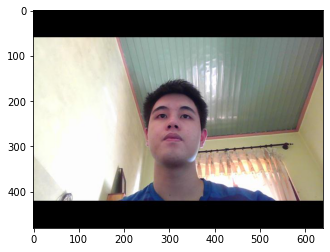

Name:  Tran Nguyen Trung
Birth day:  10-08-2001
Class:  19 KHDL
Student ID:  19127607
None
1. Sign in
2. Sign up
Press any key to EXIT
Your choose: 0
Invalid key. Exit!


In [10]:
while True:
    print("1. Sign in")
    print("2. Sign up")
    print("Press any key to EXIT")
    choose = input("Your choose: ")
    if choose == '1':
        #webcam()
        #location = "database/webcam/capture.jpg"
        location = input("Your image location: ")
        checker(location)
    elif choose == '2':
        sign_up()
    else:
        print("Invalid key. Exit!")
        break
    time.sleep(2)